In [1]:
import timeit
from random import randint

import numpy
import matplotlib.pyplot as plt
from tqdm import tqdm

from LogDel import Heap
from ListWrapper import ListWrapper
from fuzzy_number import FuzzyNumber

In [2]:
START = 1_000
END = 20_000
STEP = 1_000
NUMBER_OF_MEASUREMENTS_FOR_ONE_LENGTH = 1_000

In [3]:
random_list = [
    FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100)) for _ in range(100)
]

In [4]:
list_wrapper = ListWrapper(random_list)
list_wrapper

[(339122715238585431600911953786611141455, 81 73 60), (339122715317813594115549527199273421647, 40 96 79), (339122715397041756632036109733948001103, 5 76 76), (339122715476269919146400933894177655631, 41 98 100), (339122715555498081659801706259173313359, 69 76 21), (339122715634726244175632170623135353679, 15 84 54), (339122715713954406689538190571326638927, 20 98 39), (339122715793182569203259562934795733839, 34 29 37), (339122715872410731717313075770783402831, 51 89 26), (339122715951638894229813691160258382671, 86 25 7), (339122716030867056746145462457742101327, 97 83 24), (339122716110095219260901818310576278351, 70 60 68), (339122716189323381775868717445990026063, 60 34 11), (339122716268551544289659895603683363663, 32 62 53), (339122716347779706803889893250068613967, 45 54 41), (339122716427007869317013131288027564879, 25 32 6), (339122716506236031833385716457134328655, 60 80 45), (339122716585464194345179829655065561935, 28 7 44), (339122716664692356861093329137157245775, 25 75 

In [5]:
ID = list_wrapper[randint(0, 100)][0]
ID

339123513303866437789888004473752095567

In [6]:
print(list_wrapper.find(ID))
ID in list_wrapper

90


True

In [7]:
element = FuzzyNumber(0, 0, 0)
list_wrapper.insert(element)
list_wrapper

[(339122715238585431600911953786611141455, 81 73 60), (339122715317813594115549527199273421647, 40 96 79), (339122715397041756632036109733948001103, 5 76 76), (339122715476269919146400933894177655631, 41 98 100), (339122715555498081659801706259173313359, 69 76 21), (339122715634726244175632170623135353679, 15 84 54), (339122715713954406689538190571326638927, 20 98 39), (339122715793182569203259562934795733839, 34 29 37), (339122715872410731717313075770783402831, 51 89 26), (339122715951638894229813691160258382671, 86 25 7), (339122716030867056746145462457742101327, 97 83 24), (339122716110095219260901818310576278351, 70 60 68), (339122716189323381775868717445990026063, 60 34 11), (339122716268551544289659895603683363663, 32 62 53), (339122716347779706803889893250068613967, 45 54 41), (339122716427007869317013131288027564879, 25 32 6), (339122716506236031833385716457134328655, 60 80 45), (339122716585464194345179829655065561935, 28 7 44), (339122716664692356861093329137157245775, 25 75 

In [8]:
del list_wrapper[-1]
list_wrapper

[(339122715238585431600911953786611141455, 81 73 60), (339122715317813594115549527199273421647, 40 96 79), (339122715397041756632036109733948001103, 5 76 76), (339122715476269919146400933894177655631, 41 98 100), (339122715555498081659801706259173313359, 69 76 21), (339122715634726244175632170623135353679, 15 84 54), (339122715713954406689538190571326638927, 20 98 39), (339122715793182569203259562934795733839, 34 29 37), (339122715872410731717313075770783402831, 51 89 26), (339122715951638894229813691160258382671, 86 25 7), (339122716030867056746145462457742101327, 97 83 24), (339122716110095219260901818310576278351, 70 60 68), (339122716189323381775868717445990026063, 60 34 11), (339122716268551544289659895603683363663, 32 62 53), (339122716347779706803889893250068613967, 45 54 41), (339122716427007869317013131288027564879, 25 32 6), (339122716506236031833385716457134328655, 60 80 45), (339122716585464194345179829655065561935, 28 7 44), (339122716664692356861093329137157245775, 25 75 

In [3]:
def moving_avg(x, n):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

In [10]:
def find_speed_test(start: int, end: int, step: int) -> list[float]:
    speed_measurements = []

    for list_size in range(start, end+step, step):
        list_random_elements = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(list_size)
        ]
        list_wrapper = ListWrapper(list_random_elements)
        ID = list_wrapper[randint(0, len(list_wrapper)-1)][0]

        for _ in tqdm(
                range(NUMBER_OF_MEASUREMENTS_FOR_ONE_LENGTH),
                desc=f"{list_size} elements"):
            execution_time = timeit.timeit(
                lambda: list_wrapper.find(ID),
                number=1)

            speed_measurements.append(execution_time)

    return speed_measurements

In [11]:
find_array = find_speed_test(START, END, STEP)
numpy_find = numpy.array(find_array)

20000 elements: 100%|██████████| 1000/1000 [00:00<00:00, 11692.16it/s]


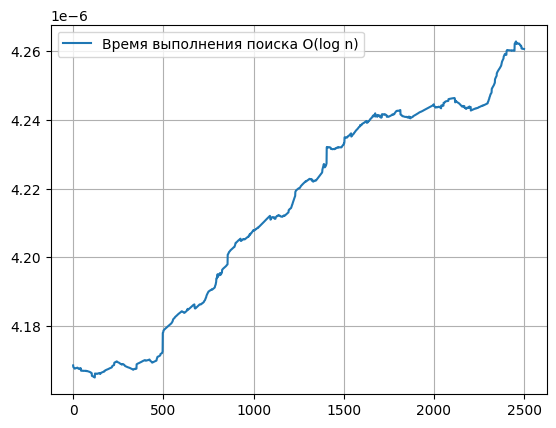

In [37]:
ax = plt.subplot()

mean_find = moving_avg(find_array, 17_500)
x_line = range(0, len(mean_find))

ax.plot(x_line, mean_find, label="Время выполнения поиска O(log n)")

ax.legend()
ax.grid()

In [80]:
def insert_speed_test(start: int, end: int, step: int) -> list[float]:
    speed_measurements = []

    for list_size in range(start, end+step, step):
        list_random_elements = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(list_size)
        ]
        list_wrapper = ListWrapper(list_random_elements)
        element = FuzzyNumber(0, 0, 0)

        for _ in tqdm(
                range(NUMBER_OF_MEASUREMENTS_FOR_ONE_LENGTH),
                desc=f"{list_size} elements"):
            execution_time = timeit.timeit(
                lambda: list_wrapper.insert(element),
                number=1)

            speed_measurements.append(execution_time)

    return speed_measurements

In [81]:
insert_array = insert_speed_test(START, END, STEP)
numpy_insert = numpy.array(insert_array)

20000 elements: 100%|██████████| 1000/1000 [00:00<00:00, 13510.58it/s]


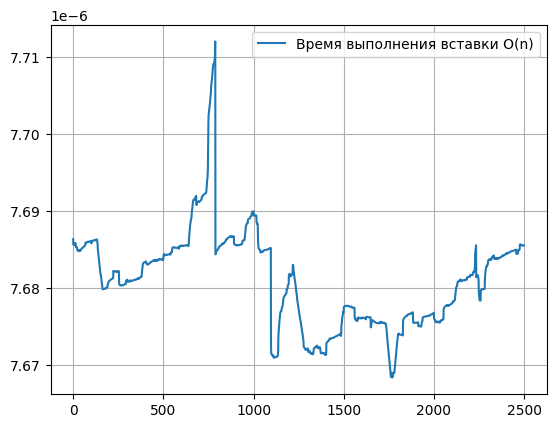

In [84]:
ax = plt.subplot()

mean_insert = moving_avg(numpy_insert, 17_500)
x_line = range(0, len(mean_insert))

ax.plot(x_line, mean_insert, label="Время выполнения вставки O(n)")

ax.legend()
ax.grid()

In [16]:
def contain_speed_test(start: int, end: int, step: int) -> list[float]:
    speed_measurements = []

    for list_size in range(start, end+step, step):
        list_random_elements = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(list_size)
        ]
        list_wrapper = ListWrapper(list_random_elements)
        ID = list_wrapper[randint(0, len(list_wrapper)-1)][0]

        for _ in tqdm(
                range(NUMBER_OF_MEASUREMENTS_FOR_ONE_LENGTH),
                desc=f"{list_size} elements"):
            execution_time = timeit.timeit(
                lambda: list_wrapper.__contains__(ID),
                number=1)

            speed_measurements.append(execution_time)

    return speed_measurements

In [17]:
contain_array = contain_speed_test(START, END, STEP)
numpy_contain = numpy.array(contain_array)

20000 elements: 100%|██████████| 1000/1000 [00:00<00:00, 14081.32it/s]


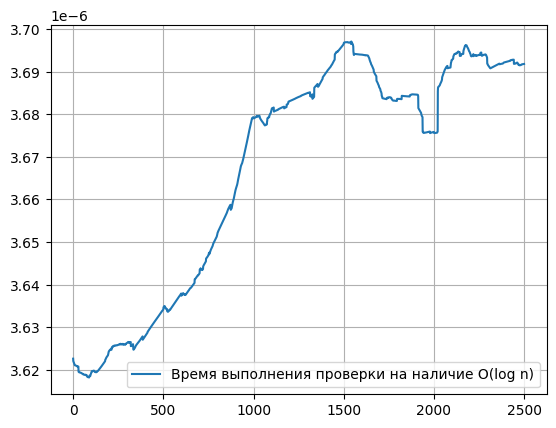

In [36]:
ax = plt.subplot()

mean_contain = moving_avg(numpy_contain, 17_500)
x_line = range(0, len(mean_contain))

ax.plot(x_line, mean_contain, label="Время выполнения проверки на наличие O(log n)")

ax.legend()
ax.grid()

In [4]:
def delete_speed_test(start: int, end: int, step: int) -> list[float]:
    speed_measurements = []

    for list_size in range(start, end+step, step):
        list_random_elements = [
            FuzzyNumber(randint(0, 100), randint(0, 100), randint(0, 100))
            for _ in range(list_size)
        ]

        def execute_delete():
            list_wrapper = Heap(list_random_elements)
            index = randint(0, len(list_wrapper)-1)

            list_wrapper.__delitem__(index)

        for _ in tqdm(
                range(NUMBER_OF_MEASUREMENTS_FOR_ONE_LENGTH),
                desc=f"{list_size} elements"):
            execution_time = timeit.timeit(
                lambda: execute_delete(),
                number=1)

            speed_measurements.append(execution_time)

    return speed_measurements

In [5]:
delete_array = delete_speed_test(START, END, STEP)
numpy_delete = numpy.array(delete_array)

20000 elements: 100%|██████████| 1000/1000 [01:18<00:00, 12.68it/s]


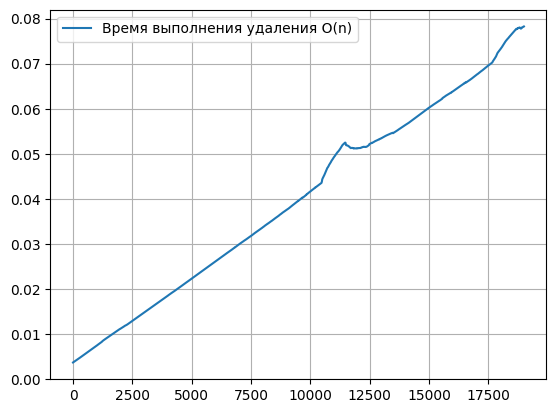

In [6]:
ax = plt.subplot()

mean_delete = moving_avg(numpy_delete, 1000)
x_line = range(0, len(mean_delete))

ax.plot(x_line, mean_delete, label="Время выполнения удаления O(n)")

ax.legend()
ax.grid()